In [ ]:
from tda import Topology

In [37]:
tp = Topology()

### Topological analysis
## The idea:
- Get **frequency of each word/POS (part of speech)** in each book.
- Compute **pairwise distances** (cosine distance or other metrics).
- Plot persistance homology diagrams and detect data features.

### 1) Dataframe with separate words freqs

In [38]:
data_words, words_freq_by_books, books_list_for_words = tp.read_freq_table(filename="/home/team/frequencies_analyzed_1000mfw_0c.txt", n_words=100)

### 2) Prepare dataframe with part of speeches

In [39]:
ps = pd.read_csv("../spacy_text_proc/pos_counts.csv")
ps_dict = tp.ps_preprocessing(ps)

keys_to_remove = [ '02 Записки счастливой прихожанки.txt', '01 Я очень хочу жить. Мой личный опыт.txt',    '03 Никто из ниоткуда.txt',     '05 Никогда не сдавайся.txt']

ps_dict, ps_list = tp.remove_outliers(ps_dict, keys_to_remove)

### 3) Analyze both dataframes

In [ ]:
diagrams_words, dist_matrix_words, book_indices_words = tp.analyze_books_tda(words_freq_by_books, books_list_for_words)
tp.plot_persistence_diagram(diagrams_words) 
#show plot in notebook

In [33]:
fig = tp.create_interactive_plot(diagrams_words, dist_matrix_words, book_indices_words)
fig.show() # show plot in browser

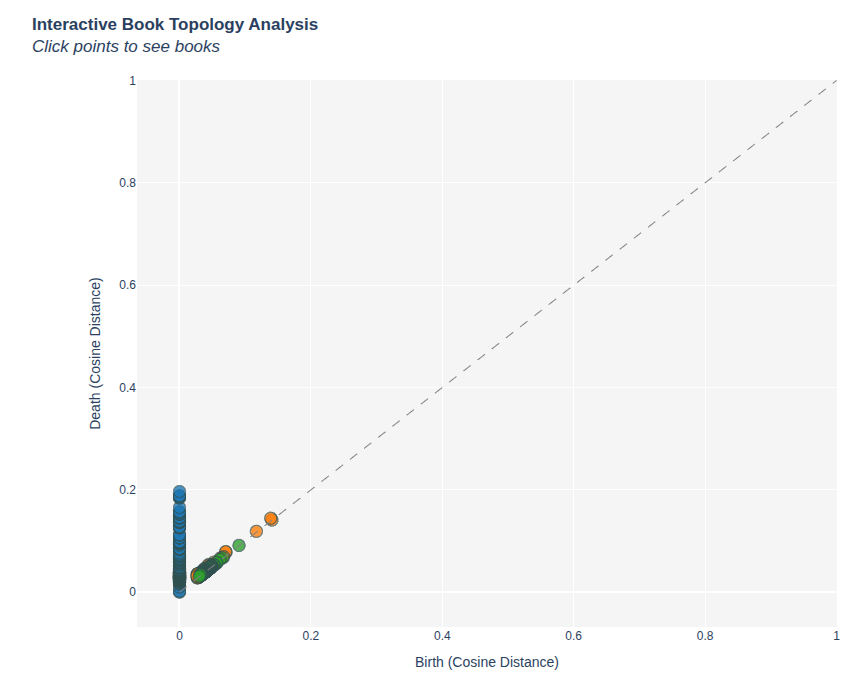

In [7]:
result1 = tp.get_books_from_coords(diagrams_words, dist_matrix_words, book_indices_words,
    target_birth=0.138,
    target_death=0.144,
    dim =1)
tp.get_missing_books(result1, books_list_for_words)
# see which books are topologically different from others in dataset

Books only in books_list: ['Dasha_Vasilieva_43', 'Kulinariya_01', 'Kulinariya_02', 'Kulinariya_07', 'Kulinariya_09', 'Skazki_doliny_21', 'Skazki_doliny_23', 'Skazki_pro_sobak_01', 'Skazki_pro_sobak_03', 'Skazki_pro_sobak_04', 'Skazki_pro_sobak_08', 'Viola_Tarakanova_23']


In [ ]:
diagrams_ps, dist_matrix_ps, book_indices_ps = tp.analyze_books_tda(ps_dict, ps_list)
fig = tp.plot_persistence_diagram(diagrams_ps)
fig #show plot in notebook

In [9]:
fig = tp.create_interactive_plot(diagrams_ps, dist_matrix_ps, book_indices_ps)
fig.show()  # show plot in browser

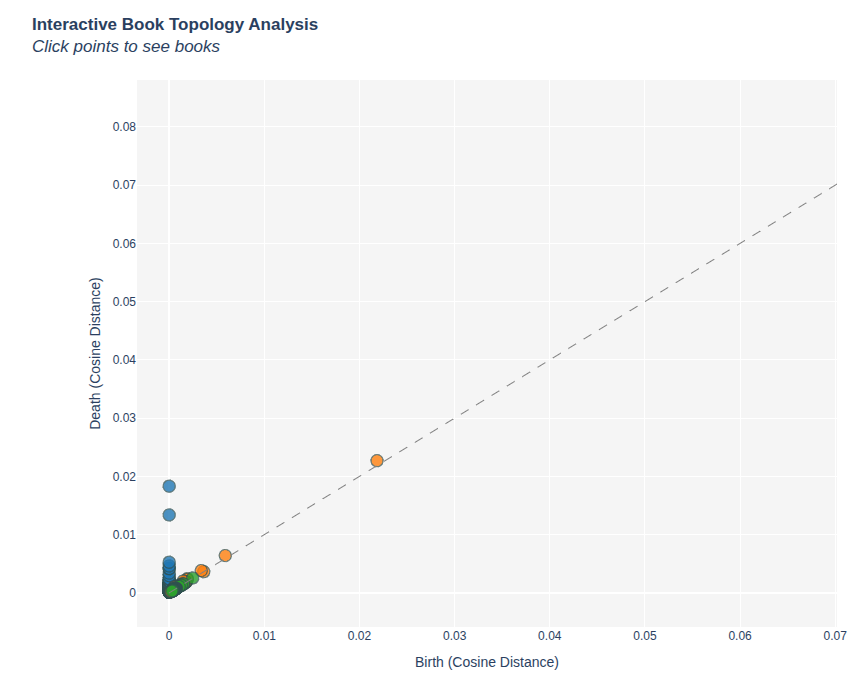

In [10]:
result2 = tp.get_books_from_coords(
    diagrams_ps, dist_matrix_ps, book_indices_ps,
    target_birth=0.0,
    target_death=0.0134, 
    dim=0              
)
tp.get_missing_books(result2, ps_list)

Books only in books_list: []
